# 线性回归

注意:矩阵无法进行索引,如下例

In [134]:
a = np.mat([ [2,4], [1,5]])
a[0][0][0]

matrix([[2, 4]])

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from pyecharts import *

In [108]:
def loadDataSet():
    dataSet = np.array([ [1, 1, 2],
                      [2, 1, 3],
                      [4, 1, 6],
                      [7, 1, 9],
                       [6, 1, 8]])
    
    return dataSet

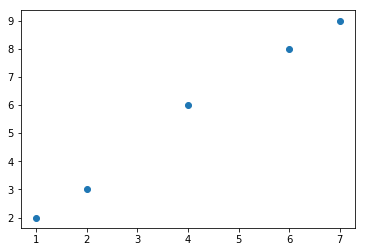

In [109]:
dataSet = loadDataSet()
plt.scatter(dataSet[:, 0], dataSet[:, 2])
plt.show()

## 解析解

In [110]:
def toFit(dataSet):  #尝试解析解/梯度下降法
    #直线拟合
    m, n = dataSet.shape
    X = np.mat(dataSet[:, :2]) ; Y = np.mat(dataSet[:, 2].reshape(m, 1))
    
    return (X.T * X).I * X.T * Y

解析解得到的结果是 [1.1923, 0.83]

## 梯度下降法

In [114]:
def toFitWithSGD(dataSet, steps, alpha=0.013):
    m, n = dataSet.shape
    X = np.mat(dataSet[:, :2]) ; Y = np.mat(dataSet[:, 2].reshape((m, 1)))
    weight = np.mat(np.ones((1, 2)))

    for i in range(0, steps):
        weight += alpha * (np.multiply((Y - X * weight.T), X)).sum(axis = 0)
    print(weight)
    
    return np.array(weight)   #因为矩阵无法进行索引,所以这里要array化矩阵

使用梯度下降法时,当alpha > 0.01时,weight的值巨大,原因或许是该损失函数的二阶导数为正,步长太大导致跳过了谷底并来回振荡

In [121]:
def plot(weight):
    x_cord = []; y_cord = []
    for i in range(1, 8):
        x_cord.append(i)
        y_cord.append(weight[0][0] * i + weight[0][1])
        
    plt.scatter(dataSet[:, 0], dataSet[:, 2])
    plt.plot(x_cord, y_cord)
    plt.show()

[[1.19060284 0.83970401]]


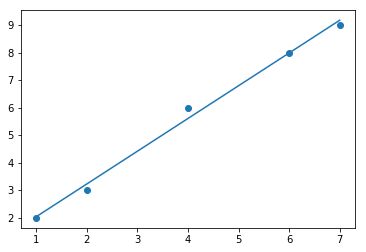

In [122]:
def main():
    dataSet = loadDataSet()
    weight = toFitWithSGD(dataSet, 200, 0.013)
    plot(weight)
    
    return

main()